# Notebook 11 
# Sunint Bindra

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import random_unitary

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
print('Libraries imported successfully!')

Libraries imported successfully!


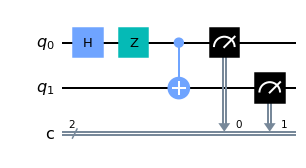

In [4]:
# 2 qubit and 2 bit circuit 
qc = QuantumCircuit(2,2)
qc.h(0)
qc.z(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

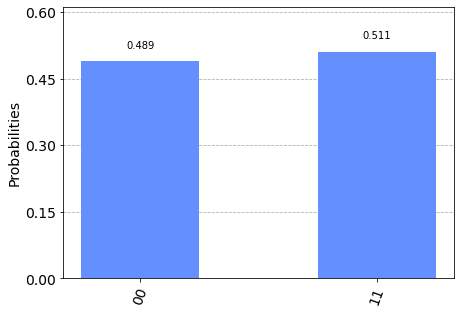

In [6]:
# Simulating using QASM Simulator and plotting histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots = 1024)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

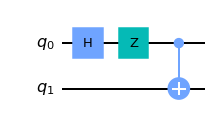

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.z(0)
qc.cx(0,1)
qc.draw()

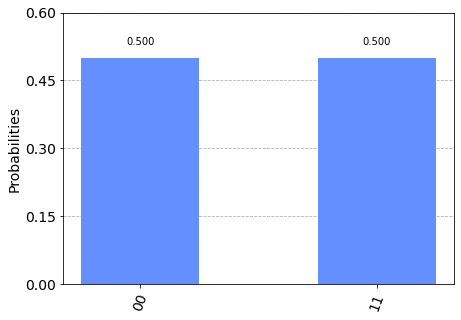

In [8]:
# Simulating using Statevector Simulator and plotting histogram
backend = Aer.get_backend('statevector_simulator') 
job = execute(qc,backend) 
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

In [22]:
# Random unitary of size 4 using random_unitary function

U = random_unitary(4)
print(U)

Operator([[ 0.10120073+0.75666909j, -0.39525487+0.03149209j,
           -0.19922216+0.31189049j, -0.33330929+0.1092333j ],
          [ 0.01566594-0.35491299j,  0.33147629+0.013409j  ,
           -0.12719816+0.47366422j, -0.71314541-0.1209193j ],
          [ 0.28772064-0.00455777j, -0.20090394-0.62923844j,
            0.44098097+0.24535861j,  0.06751669-0.47081746j],
          [-0.36003629-0.28030622j, -0.44285993+0.31669729j,
            0.00415437+0.60647785j,  0.34764557-0.08179321j]],
         input_dims=(2, 2), output_dims=(2, 2))


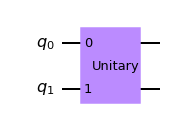

In [18]:
# 2 Qubit quantum circuit and applying transformation U 

qc = QuantumCircuit(2)
qc.unitary(U,[0,1])
qc.draw()

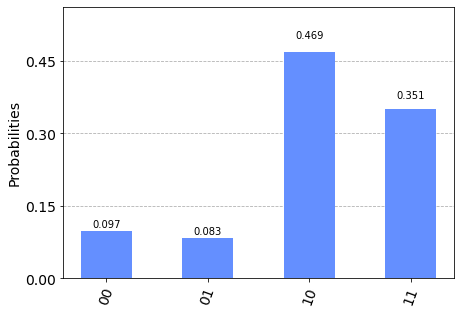

In [19]:
# Simulating using Statevector Simulator and plotting histogram
backend = Aer.get_backend('statevector_simulator') 
job = execute(qc,backend) 
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

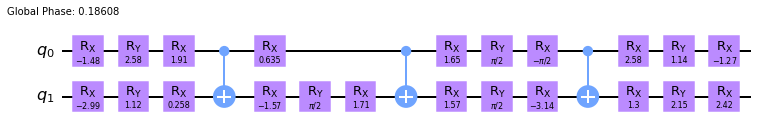

In [20]:
# Transpile circuit using using the gates Rx, Ry, and CX 

transpiled_qc = transpile(qc,basis_gates = ['rx','ry','cx'])
transpiled_qc.draw()

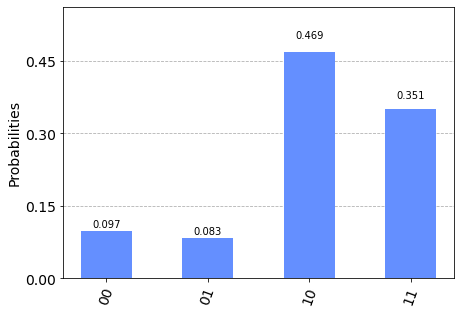

In [21]:
# Simulaing using Statevector simulator and plotting histogram 

backend = Aer.get_backend('statevector_simulator') 
job = execute(transpiled_qc,backend)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)